# 1. Import Statements

In [ ]:
# Import library
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sn
import pandas as pd
import numpy as np

In [ ]:
import numpy as np
import pandas as pd 
import os

import cv2
import skimage
import IPython.display
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob

from collections import OrderedDict
import torch
import gc

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
from PIL import Image
from torch import nn, optim
import glob
import os
import json
from torch.utils.data import Dataset, DataLoader, BatchSampler
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import random
from matplotlib.pyplot import imshow
import torchtext
import nltk, re, string, collections
from nltk.util import ngrams
import collections
%matplotlib inline
BATCH_SIZE = 128
EPOCH = 5

In [ ]:
df_artwork = pd.read_csv("/content/artwork_dataset.csv")

df_info = pd.read_csv("/content/info_dataset.csv")

# path filename
# os.path.exists("/artwork/0.jpg")

In [ ]:
df_artwork.head()

,ID,artist,title,picture data,file info,jpg url
0,0,"AACHEN, Hans von",venus and adonis,"1574-88, oil on canvas, 68 x 95 cm, fogg art m...","1700*1211, true color, 252 kb",https://www.wga.hu/art/a/aachen/adonis.jpg
1,1,"AACHEN, Hans von",procuring scene,"1605-10, oil on wood, 114 x 130 cm, kunsthisto...","1370*1168, true color, 212 kb",https://www.wga.hu/art/a/aachen/z_scene.jpg
2,2,"AACHEN, Hans von",self-portrait with a glass of wine,"c. 1596, oil on canvas, 53 x 44 cm, private co...","896*1074, true color, 57 kb",https://www.wga.hu/art/a/aachen/selfport.jpg
3,3,"AACHEN, Hans von",two laughing men (self-portrait),"before 1574, oil on panel, 48 x 39 cm, archdio...","1173*1500, true color, 210 kb",https://www.wga.hu/art/a/aachen/selfpor1.jpg
4,4,"AACHEN, Hans von",portrait of emperor rudolf ii,"1606-08, oil on canvas, 60 x 48 cm, kunsthisto...","1149*1500, true color, 247 kb",https://www.wga.hu/art/a/aachen/rudolf2.jpg


In [ ]:
df_info.head()

,artist,born-died,period,school,url,base,nationality
0,"AACHEN, Hans von",(1552-1615),Mannerism,painter,https://www.wga.hu/html/a/aachen/index.html,Germany,German
1,"AAGAARD, Carl Frederik",(1833-1895),Realism,painter,https://www.wga.hu/html/a/aagaard/index.html,Copenhagen,Danish
2,"ABADIA, Juan de la",(active 1470-1490),Early Renaissance,painter,https://www.wga.hu/html/a/abadia/index.html,Huesca,Spanish
3,"ABADIE, Paul",(1812-1884),Art Nouveau,architect,https://www.wga.hu/html/a/abadie/index.html,Paris,French
4,"ABAQUESNE, Masséot",(c 1500-1564),High Renaissance,potter,https://www.wga.hu/html/a/abaquesn/index.html,France,French


In [ ]:
print(df_artwork["artist"].nunique())
df_artwork["artist"].value_counts()[:40]

5565


GIOTTO di Bondone                 551
REMBRANDT Harmenszoon van Rijn    539
RAFFAELLO Sanzio                  439
GOGH, Vincent van                 420
CRANACH, Lucas the Elder          339
RUBENS, Peter Paul                331
TINTORETTO                        282
TIZIANO Vecellio                  275
VERONESE, Paolo                   265
GRECO, El                         255
TIEPOLO, Giovanni Battista        251
DONATELLO                         245
ANGELICO, Fra                     244
BRUEGEL, Pieter the Elder         223
LEONARDO da Vinci                 215
MEMLING, Hans                     209
BERNINI, Gian Lorenzo             207
MANTEGNA, Andrea                  204
BOTTICELLI, Sandro                204
MONET, Claude                     198
GOYA Y LUCIENTES, Francisco de    197
PIERO DELLA FRANCESCA             190
CARAVAGGIO                        185
GAUGUIN, Paul                     184
DUCCIO di Buoninsegna             170
GHIRLANDAIO, Domenico             170
WEYDEN, Rogi

In [ ]:
df_info["period"].value_counts()

Baroque                 1945
Rococo                   458
Mannerism                423
Romanticism              408
Neoclassicism            397
Early Renaissance        382
Realism                  355
Northern Renaissance     341
Medieval                 289
High Renaissance         279
Impressionism            186
Art Nouveau              108
Name: period, dtype: int64

In [ ]:
df_info["school"].value_counts()

painter          3554
sculptor          831
architect         607
graphic           328
goldsmith          83
illuminator        62
cabinet-maker      38
glass              20
tapestry           17
miniaturist        16
potter             15
Name: school, dtype: int64

In [ ]:
df_combined = df_artwork.merge(df_info)
# painters only
df_combined = df_combined[df_combined["school"] == "painter"]
df_combined

,ID,artist,title,picture data,file info,jpg url,born-died,period,school,url,base,nationality
0,0,"AACHEN, Hans von",venus and adonis,"1574-88, oil on canvas, 68 x 95 cm, fogg art m...","1700*1211, true color, 252 kb",https://www.wga.hu/art/a/aachen/adonis.jpg,(1552-1615),Mannerism,painter,https://www.wga.hu/html/a/aachen/index.html,Germany,German
1,1,"AACHEN, Hans von",procuring scene,"1605-10, oil on wood, 114 x 130 cm, kunsthisto...","1370*1168, true color, 212 kb",https://www.wga.hu/art/a/aachen/z_scene.jpg,(1552-1615),Mannerism,painter,https://www.wga.hu/html/a/aachen/index.html,Germany,German
2,2,"AACHEN, Hans von",self-portrait with a glass of wine,"c. 1596, oil on canvas, 53 x 44 cm, private co...","896*1074, true color, 57 kb",https://www.wga.hu/art/a/aachen/selfport.jpg,(1552-1615),Mannerism,painter,https://www.wga.hu/html/a/aachen/index.html,Germany,German
3,3,"AACHEN, Hans von",two laughing men (self-portrait),"before 1574, oil on panel, 48 x 39 cm, archdio...","1173*1500, true color, 210 kb",https://www.wga.hu/art/a/aachen/selfpor1.jpg,(1552-1615),Mannerism,painter,https://www.wga.hu/html/a/aachen/index.html,Germany,German
4,4,"AACHEN, Hans von",portrait of emperor rudolf ii,"1606-08, oil on canvas, 60 x 48 cm, kunsthisto...","1149*1500, true color, 247 kb",https://www.wga.hu/art/a/aachen/rudolf2.jpg,(1552-1615),Mannerism,painter,https://www.wga.hu/html/a/aachen/index.html,Germany,German
...,...,...,...,...,...,...,...,...,...,...,...,...
45579,45554,"ZURBARÁN, Francisco de",still-life with pottery jars,"c. 1660, oil on canvas, 46 x 84 cm, museo del ...","1600*855, true color, 100 kb",https://www.wga.hu/art/z/zurbaran/1/still_li.jpg,(1598-1664),Baroque,painter,https://www.wga.hu/html/z/zurbaran/index.html,Spain,Spanish
45580,45555,"ZURBARÁN, Francisco de","still-life with lemons, oranges and rose","1633, oil on canvas, 60 x 107 cm, norton simon...","1263*700, true color, 83 kb",https://www.wga.hu/art/z/zurbaran/1/stillife.jpg,(1598-1664),Baroque,painter,https://www.wga.hu/html/z/zurbaran/index.html,Spain,Spanish
45581,45556,"ZURBARÁN, Francisco de",st marina,"1640s, oil on canvas, 111 x 88 cm, museo carme...","1590*2000, true color, 234 kb",https://www.wga.hu/art/z/zurbaran/1/marina.jpg,(1598-1664),Baroque,painter,https://www.wga.hu/html/z/zurbaran/index.html,Spain,Spanish
45582,45557,"ZURBARÁN, Juan de",still-life with plate of apples and orange blo...,"c. 1640, oil on canvas, 60 x 40 cm, private co...","1030*672, true color, 82 kb",https://www.wga.hu/art/z/zurbarax/stillife.jpg,(1620-1649),Baroque,painter,https://www.wga.hu/html/z/zurbarax/index.html,Seville,Spanish


In [ ]:
selected_styles = ["Romanticism", "Baroque", "High Renaissance", "Realism", "Impressionism", "Medieval"]
df = df_combined[(df_combined['period'].isin(selected_styles))]
df = df.drop('url', axis=1)
df

,ID,artist,title,picture data,file info,jpg url,born-died,period,school,base,nationality
21,21,"AAGAARD, Carl Frederik",deer beside a lake,"1888, oil on canvas, 53 x 82 cm, private colle...","1200*818, true color, 213 kb",https://www.wga.hu/art/a/aagaard/deerlake.jpg,(1833-1895),Realism,painter,Copenhagen,Danish
22,22,"AAGAARD, Carl Frederik",the rose garden,"1877, oil on canvas, 98 x 80 cm, private colle...","875*950, true color, 117 kb",https://www.wga.hu/art/a/aagaard/rosegard.jpg,(1833-1895),Realism,painter,Copenhagen,Danish
48,48,"ABBATI, Giuseppe",portrait of a woman,"1865-66, oil on panel, 26 x 14 cm, galleria de...","471*850, true color, 51 kb",https://www.wga.hu/art/a/abbati/abbati4.jpg,(1836-1868),Realism,painter,Italy,Italian
49,49,"ABBATI, Giuseppe",the cloister of santa croce,"1861-62, oil on cardboard, 19 x 25 cm, galleri...","1300*986, true color, 219 kb",https://www.wga.hu/art/a/abbati/abbati3.jpg,(1836-1868),Realism,painter,Italy,Italian
50,50,"ABBATI, Giuseppe",oration (the prayer),"1866, oil on canvas, 57 x 42 cm, galleria dell...","974*1300, true color, 208 kb",https://www.wga.hu/art/a/abbati/abbati5.jpg,(1836-1868),Realism,painter,Italy,Italian
...,...,...,...,...,...,...,...,...,...,...,...
45579,45554,"ZURBARÁN, Francisco de",still-life with pottery jars,"c. 1660, oil on canvas, 46 x 84 cm, museo del ...","1600*855, true color, 100 kb",https://www.wga.hu/art/z/zurbaran/1/still_li.jpg,(1598-1664),Baroque,painter,Spain,Spanish
45580,45555,"ZURBARÁN, Francisco de","still-life with lemons, oranges and rose","1633, oil on canvas, 60 x 107 cm, norton simon...","1263*700, true color, 83 kb",https://www.wga.hu/art/z/zurbaran/1/stillife.jpg,(1598-1664),Baroque,painter,Spain,Spanish
45581,45556,"ZURBARÁN, Francisco de",st marina,"1640s, oil on canvas, 111 x 88 cm, museo carme...","1590*2000, true color, 234 kb",https://www.wga.hu/art/z/zurbaran/1/marina.jpg,(1598-1664),Baroque,painter,Spain,Spanish
45582,45557,"ZURBARÁN, Juan de",still-life with plate of apples and orange blo...,"c. 1640, oil on canvas, 60 x 40 cm, private co...","1030*672, true color, 82 kb",https://www.wga.hu/art/z/zurbarax/stillife.jpg,(1620-1649),Baroque,painter,Seville,Spanish


In [ ]:
print(df["artist"].nunique())
df["artist"].value_counts()

2412


GIOTTO di Bondone                 551
REMBRANDT Harmenszoon van Rijn    539
RAFFAELLO Sanzio                  439
GOGH, Vincent van                 420
RUBENS, Peter Paul                331
                                 ... 
LION, Angelo                        1
LIONE, Andrea di                    1
LIPPARINI, Ludovico                 1
LIPPI, Lorenzo                      1
ŚLEWIŃSKI, Władisław                1
Name: artist, Length: 2412, dtype: int64

In [ ]:
# Step 1: Count the number of artworks for each artist
artist_counts = df["artist"].value_counts()

# Step 2: Create a boolean mask to identify artists with fewer than 10 artworks
artists_to_drop = artist_counts[artist_counts <= 10].index

# Step 3: Filter the DataFrame to exclude artists with fewer than 10 artworks
df_filtered = df[~df["artist"].isin(artists_to_drop)]

In [ ]:
df_filtered

,ID,artist,title,picture data,file info,jpg url,born-died,period,school,base,nationality
120,120,"AELST, Willem van",still-life,"1660s, oil on canvas, 64 x 53 cm, private coll...","1000*1208, true color, 150 kb",https://www.wga.hu/art/a/aelst/stillif.jpg,(1627-c. 1683),Baroque,painter,Delft,Dutch
121,121,"AELST, Willem van",still-life of dead birds and hunting weapons,"1660, oil on canvas, 86,5 x 68 cm, staatliche ...","830*1050, true color, 137 kb",https://www.wga.hu/art/a/aelst/weapons.jpg,(1627-c. 1683),Baroque,painter,Delft,Dutch
122,122,"AELST, Willem van",vase of flowers with pocket watch,"1656, oil on canvas, staatliche museen, kassel","900*1090, true color, 110 kb",https://www.wga.hu/art/a/aelst/vasewatc.jpg,(1627-c. 1683),Baroque,painter,Delft,Dutch
123,123,"AELST, Willem van",still-life with fruit and a crystal vase,"c. 1650, oil on canvas, 77 x 102 cm, galleria ...","1072*770, true color, 109 kb",https://www.wga.hu/art/a/aelst/stilvase.jpg,(1627-c. 1683),Baroque,painter,Delft,Dutch
124,124,"AELST, Willem van",still-life with mouse and candle,"1647, oil on copper, 19 x 25 cm, private colle...","909*700, true color, 50 kb",https://www.wga.hu/art/a/aelst/stilmous.jpg,(1627-c. 1683),Baroque,painter,Delft,Dutch
...,...,...,...,...,...,...,...,...,...,...,...
45577,45552,"ZURBARÁN, Francisco de",st hugo of grenoble in the carthusian refectory,"c. 1633, oil on canvas, 102 x 168 cm, museo de...","840*733, true color, 138 kb",https://www.wga.hu/art/z/zurbaran/1/st_hugo.jpg,(1598-1664),Baroque,painter,Spain,Spanish
45578,45553,"ZURBARÁN, Francisco de",cup of water and a rose on a silver plate,"c. 1630, oil on canvas, 21,2 x 30,1 cm, nation...","1030*732, true color, 94 kb",https://www.wga.hu/art/z/zurbaran/1/stil_lif.jpg,(1598-1664),Baroque,painter,Spain,Spanish
45579,45554,"ZURBARÁN, Francisco de",still-life with pottery jars,"c. 1660, oil on canvas, 46 x 84 cm, museo del ...","1600*855, true color, 100 kb",https://www.wga.hu/art/z/zurbaran/1/still_li.jpg,(1598-1664),Baroque,painter,Spain,Spanish
45580,45555,"ZURBARÁN, Francisco de","still-life with lemons, oranges and rose","1633, oil on canvas, 60 x 107 cm, norton simon...","1263*700, true color, 83 kb",https://www.wga.hu/art/z/zurbaran/1/stillife.jpg,(1598-1664),Baroque,painter,Spain,Spanish


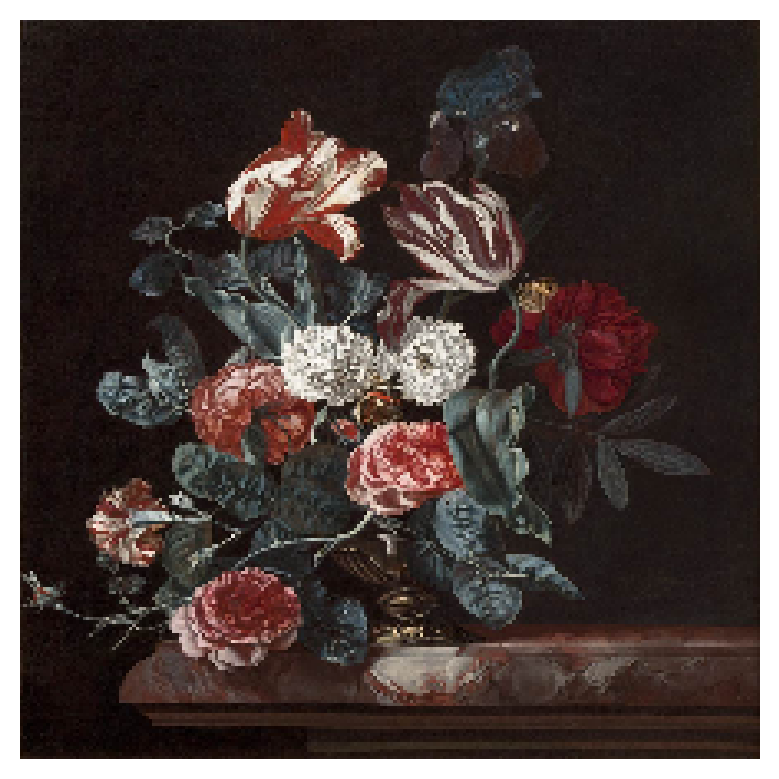

In [ ]:
import urllib.request
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Example URL of an image
image_url = "https://www.wga.hu/art/a/aelst/stillif.jpg"

# Download and load the image from the URL
image_data = urllib.request.urlopen(image_url).read()
image_array = np.asarray(bytearray(image_data), dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Resize and preprocess the image as needed
image_width = 224
image_height = 224
image = cv2.resize(image, (image_width, image_height))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.astype(np.float32) / 255.0

# Display the downloaded image
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
selected_styles = ["Romanticism", "Baroque", "High Renaissance", "Realism", "Impressionism", "Medieval"]
df_period_artists_vc = df_combined.groupby(["period"])["artist"].value_counts()
df_period_artists_vc.groupby(level='period').nlargest(5)

period                period                artist                              
Art Nouveau           Art Nouveau           KLIMT, Gustav                            44
                                            DENIS, Maurice                           30
                                            MOSER, Koloman                           26
                                            MUNCH, Edvard                            24
                                            BONNARD, Pierre                          22
Baroque               Baroque               REMBRANDT Harmenszoon van Rijn          539
                                            RUBENS, Peter Paul                      331
                                            CARAVAGGIO                              185
                                            CANALETTO                               159
                                            HALS, Frans                             153
Early Renaissance     Early Renaissance

In [ ]:
# 6 periods / schools, 13 artists
romantics = ["GOYA Y LUCIENTES, Francisco de", "DELACROIX, Eugène"]
medievals = ["GIOTTO di Bondone", "DUCCIO di Buoninsegna"]
northern_rens = ["BRUEGEL, Pieter the Elder", "BOSCH, Hieronymus"]
# excluding Da Vinci -- a lot are draft works "LEONARDO da Vinci", 
early_rens = ["ANGELICO, Fra", "BOTTICELLI, Sandro"]
impressionists = ["GOGH, Vincent van", "MONET, Claude"]
baroque = ["REMBRANDT Harmenszoon van Rijn", "CARAVAGGIO"]

In [ ]:
'''
import cv2
import urllib.request
import numpy as np
import pandas as pd

# Loop over rows in the DataFrame
for index, row in df.iterrows():
    # Extract the "jpg url" value from the row
    image_url = row["jpg url"]
    
    # Download and load the image from the URL
    image_data = urllib.request.urlopen(image_url).read()
    image_array = np.asarray(bytearray(image_data), dtype=np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
    '''

    # Resize and preprocess the image as needed
    image_width = 128
    image_height = 128
    image = cv2.resize(image, (image_width, image_height))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.astype(np.float32) / 255.0
    
    # Save the image as a file in Colab
    image_filename = f"image_{index}.jpg" # Change the filename as desired
    cv2.imwrite(image_filename, image)
'''

# 2. Exploratory Data Analysis

# 3. Data Preprocessing

## Text Preprocessong

In [ ]:
text = []
for i in ids:
  row = df_filtered[df_filtered['ID'] == int(i)]
  artist = row['artist'].values[0]
  period = row['period'].values[0]
  title = row['title'].values[0]
  temp = "This is an artwork from painter " + artist + " during the period of " + period + ". The title of this painting is " + title +"."
  text.append(temp)


In [ ]:
text

['This is an artwork from painter AELST, Willem van during the period of Baroque. The title of this painting is still-life.',
 'This is an artwork from painter AELST, Willem van during the period of Baroque. The title of this painting is still-life of dead birds and hunting weapons.',
 'This is an artwork from painter AELST, Willem van during the period of Baroque. The title of this painting is vase of flowers with pocket watch.',
 'This is an artwork from painter AELST, Willem van during the period of Baroque. The title of this painting is still-life with fruit and a crystal vase.',
 'This is an artwork from painter AELST, Willem van during the period of Baroque. The title of this painting is still-life with mouse and candle.',
 'This is an artwork from painter AELST, Willem van during the period of Baroque. The title of this painting is still-life with peaches and plums.',
 'This is an artwork from painter AELST, Willem van during the period of Baroque. The title of this painting is 

## Image Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import images an
import os
import glob

IMG_ROOT = "/content/drive/MyDrive/artwork"
#JSON_ROOT = ?
#img_paths = glob.glob(os.path.join(IMG_ROOT, "*.jpg"))

In [ ]:
# keep corresponding images from folder
ids= []
for i in range(13976):
  id = df_filtered['ID']
  ids.append(id)
print(len(ids))

13976


In [ ]:
print(13976/32)

436.75


In [ ]:
ids = df_filtered['ID'].values
ids

array([  120,   121,   122, ..., 45554, 45555, 45556])

In [ ]:
img_paths = []
for id in ids:
  temp = '/content/drive/MyDrive/artwork/' + str(id) + '.jpg'
  img_paths.append(temp)

In [ ]:
d = {}
for i, img_path in enumerate(img_paths):
  '''
    name = img_path.split("/")[-1].split(".")[0]
    with open(os.path.join(JSON_ROOT, name+".json"), "r") as f:
        captions = json.load(f)
        temp = []
        for cap in captions:
            if "http" not in (cap[0]+ ' '+cap[1]) and len(cap[0]+ ' '+cap[1]) >= 8 and len(cap[0]+ ' '+cap[1]) <= 72:
                temp.append(cap[0]+ ' '+cap[1])
      '''
  d[img_path] = text
len(d)

13976

In [ ]:
train_img_paths, remaining_img_paths = train_test_split(img_paths, test_size=0.4, random_state=12345)
valid_img_paths, test_img_paths = train_test_split(remaining_img_paths, test_size=0.5, random_state=12345)
d_train = {k: d[k] for k in train_img_paths}
d_test = {k: d[k] for k in test_img_paths}
len(d_train), len(d_test)

(8385, 2796)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device, jit=False)
text = clip.tokenize(['Imagination', 'Light', 'Religious']).to(device)

text.shape

100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 121MiB/s]


torch.Size([3, 77])

# 4. CNN for Classification

In [ ]:
img_paths

['/content/drive/MyDrive/artwork/120.jpg',
 '/content/drive/MyDrive/artwork/121.jpg',
 '/content/drive/MyDrive/artwork/122.jpg',
 '/content/drive/MyDrive/artwork/123.jpg',
 '/content/drive/MyDrive/artwork/124.jpg',
 '/content/drive/MyDrive/artwork/125.jpg',
 '/content/drive/MyDrive/artwork/126.jpg',
 '/content/drive/MyDrive/artwork/127.jpg',
 '/content/drive/MyDrive/artwork/128.jpg',
 '/content/drive/MyDrive/artwork/129.jpg',
 '/content/drive/MyDrive/artwork/130.jpg',
 '/content/drive/MyDrive/artwork/131.jpg',
 '/content/drive/MyDrive/artwork/132.jpg',
 '/content/drive/MyDrive/artwork/133.jpg',
 '/content/drive/MyDrive/artwork/134.jpg',
 '/content/drive/MyDrive/artwork/135.jpg',
 '/content/drive/MyDrive/artwork/136.jpg',
 '/content/drive/MyDrive/artwork/137.jpg',
 '/content/drive/MyDrive/artwork/138.jpg',
 '/content/drive/MyDrive/artwork/139.jpg',
 '/content/drive/MyDrive/artwork/140.jpg',
 '/content/drive/MyDrive/artwork/320.jpg',
 '/content/drive/MyDrive/artwork/321.jpg',
 '/content/

In [ ]:
df_filtered['period']

120      Baroque
121      Baroque
122      Baroque
123      Baroque
124      Baroque
          ...   
45577    Baroque
45578    Baroque
45579    Baroque
45580    Baroque
45581    Baroque
Name: period, Length: 13976, dtype: object

In [ ]:
import os

train_ids = [os.path.basename(path).split('.')[0] for path in train_paths]
train_ids = [id.split('/')[-1] for id in train_ids]

print(train_ids)
train_labels = []
test_labels = []

for i in train_ids:
  row = df_filtered[df_filtered['ID'] == int(i)]
  period = row['period'].values[0]
  train_labels.append(period)

['34352', '29261', '22442', '41598', '38595', '22406', '30441', '34671', '12029', '25565', '40088', '30819', '34798', '39406', '30211', '8729', '1849', '15582', '24610', '41116', '42553', '45136', '32902', '36472', '38767', '40068', '34576', '4367', '42053', '21786', '23054', '14603', '30910', '9295', '9680', '20906', '13103', '38243', '20540', '34010', '41301', '25525', '17762', '5922', '34640', '13065', '5851', '31239', '41277', '13177', '32923', '12805', '20970', '25516', '33921', '709', '28317', '26118', '12804', '30810', '17922', '23749', '22915', '20632', '28315', '36406', '24875', '17884', '42257', '34310', '34412', '33659', '22925', '41201', '15393', '28310', '12462', '45529', '13628', '36660', '8909', '16711', '16303', '16840', '21412', '4369', '30499', '24787', '13035', '32874', '20951', '17868', '15378', '17919', '38760', '24781', '7499', '36381', '18299', '35005', '9313', '38526', '26179', '19626', '42835', '11661', '19801', '17014', '34804', '6533', '22731', '24432', '3658

In [ ]:
test_ids = [os.path.basename(path).split('.')[0] for path in test_paths]
test_ids = [id.split('/')[-1] for id in test_ids]
for i in test_ids:
  row = df_filtered[df_filtered['ID'] == int(i)]
  period = row['period'].values[0]
  test_labels.append(period)

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Split the image paths into training and testing sets
train_paths, test_paths = train_test_split(img_paths, test_size = 0.2, random_state = 12345)

# Define the image data generator
datagen = ImageDataGenerator(rescale=1./255)

# Define the batch size
batch_size = 32
img_size = (128, 128)

# Define the training data generator
train_generator = datagen.flow_from_dataframe(
    dataframe = pd.DataFrame({"filename": train_paths, "label": train_labels}),
    x_col = "filename",
    y_col = "label",
    batch_size = batch_size,
    target_size = img_size,
    class_mode = 'categorical',
)

# Define the testing data generator
test_generator = datagen.flow_from_dataframe(
    dataframe = pd.DataFrame({"filename": test_paths, "label": test_labels}),
    x_col = "filename",
    y_col = "label",
    batch_size = batch_size,
    target_size = img_size,
    class_mode = 'categorical',
)

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', 
                 input_shape = (128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(len(selected_styles), 
                activation = 'softmax'))

# Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs = 20,
    steps_per_epoch = np.ceil(len(train_paths) / batch_size),
    validation_data = test_generator,
    validation_steps = np.ceil(len(test_paths) / batch_size)
)

Found 11180 validated image filenames belonging to 6 classes.
Found 2796 validated image filenames belonging to 6 classes.
Epoch 1/20
350/350 [==============================] - 12005s 34s/step - loss: 1.2299 - accuracy: 0.5699 - val_loss: 1.0768 - val_accuracy: 0.6073
Epoch 2/20
350/350 [==============================] - 217s 621ms/step - loss: 1.0852 - accuracy: 0.6169 - val_loss: 1.0436 - val_accuracy: 0.6305
Epoch 3/20
350/350 [==============================] - 213s 610ms/step - loss: 1.0203 - accuracy: 0.6360 - val_loss: 0.9974 - val_accuracy: 0.6352
Epoch 4/20
350/350 [==============================] - 211s 604ms/step - loss: 0.9534 - accuracy: 0.6555 - val_loss: 0.9725 - val_accuracy: 0.6491
Epoch 5/20
350/350 [==============================] - 211s 604ms/step - loss: 0.8720 - accuracy: 0.6811 - val_loss: 0.9907 - val_accuracy: 0.6452
Epoch 6/20
350/350 [==============================] - 211s 602ms/step - loss: 0.8041 - accuracy: 0.7036 - val_loss: 0.9796 - val_accuracy: 0.6384
E

In [ ]:
# Test the model on the test set
test_loss, test_acc = model.evaluate(test_generator)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

88/88 [==============================] - 44s 499ms/step - loss: 2.9523 - accuracy: 0.6577
Test loss: 2.9523122310638428
Test accuracy: 0.6577253341674805


## Test the CNN Exmpale Output

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load and preprocess the input image
image_path = '/content/drive/MyDrive/artwork/32903.jpg'
image = load_img(image_path, target_size=img_size)
image_array = img_to_array(image)
image_array = image_array / 255.0  # Normalize pixel values
image_array = image_array.reshape((1, *image_array.shape))

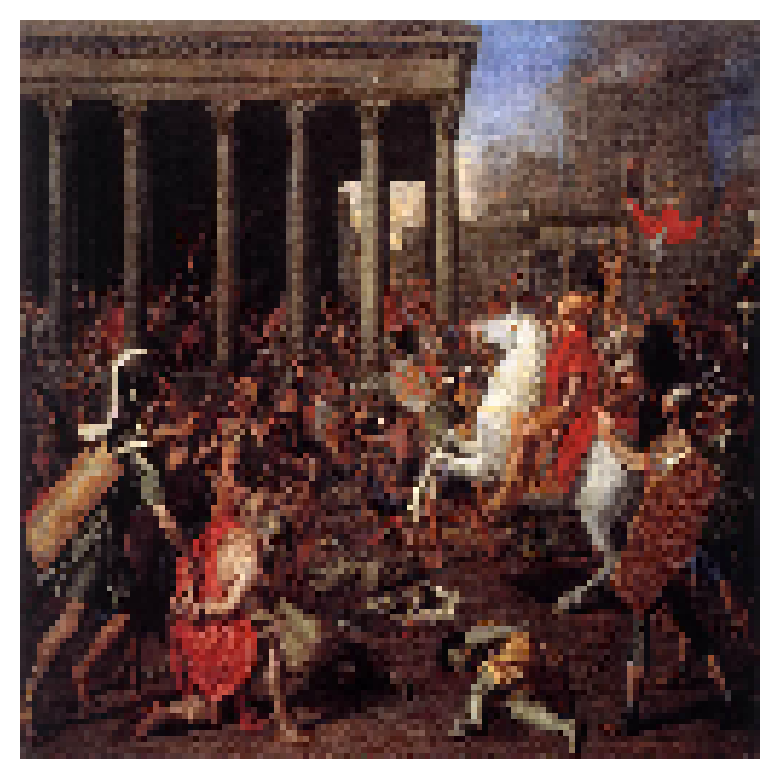

In [ ]:
import matplotlib.pyplot as plt

# Load and preprocess the input image
image_path = '/content/drive/MyDrive/artwork/32903.jpg'
image = load_img(image_path, target_size=img_size)

# Display the input image
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
# Make predictions
predictions = model.predict(image_array)

1/1 [==============================] - 0s 19ms/step


In [ ]:
import numpy as np

# Get the predicted class label
predicted_class_index = np.argmax(predictions)
predicted_class = selected_styles[predicted_class_index]

print('Predicted class:', predicted_class)

Predicted class: Romanticism


In [ ]:
print(test_ids[50])
print(test_labels[50])

32903
Baroque


In [ ]:
example_id = 20542
example_label = test_labels[50]

print("Test example ID:", example_id)
print("Corresponding label:", example_label)


Test example ID: 20542
Corresponding label: Baroque


# 5. Fine-tune the Pretrained Model


In [ ]:
#import requireed packages
! pip install ftfy regex tqdm

#import CLIP library
! pip install git+https://github.com/openai/CLIP.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 4.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-271fmsne
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-271fmsne
  Resolved https://github.com/openai/CLIP.git to commit a9b1bf5920416aaeaec965c25dd9e8f98c864f16
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369370 sha256=554ff81708915863477bfd2f62121e5588213a220a9530fa96ad4aefcbc13fa6
  Stored in directory: /tmp/pip-ephem-wheel-cache-7blmzryo/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [ ]:
import torch
from pkg_resources import packaging
import clip
clip.available_models()

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

In [ ]:
model, preprocess = clip.load("ViT-B/32")
model.cuda().eval() #move model to GPU if avaliable and set to evaluation mode
input_resolution = model.visual.input_resolution
context_length = model.context_length
vocab_size = model.vocab_size

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)

Model parameters: 151,277,313
Input resolution: 224
Context length: 77
Vocab size: 49408


In [ ]:
#Define a custom dataset class that takes two argument "Dataset" (a dictionary containing image paths as keys and a list of captions for each image as values)
# and "preprocess" (CLIP model's preprocessing function)
class ArtDataset(Dataset):
    def __init__(self, data, preprocess):
        self.preprocess = preprocess
        self.img_paths = []
        self.captions = []
        for img_path, captions in data.items():
            for cap in captions:
                self.img_paths.append(img_path)
                self.captions.append(cap)
        self.processed_cache = {}
        for img_path in data:
            self.processed_cache[img_path] = self.preprocess(Image.open(img_path))
        self.img_paths_set = list(data.keys())
        self.path2label = {path: self.img_paths_set.index(path) for path in self.img_paths_set}
        
    def __len__(self):
        return len(self.captions)

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        image = self.processed_cache[img_path]
        caption = self.captions[idx]
        label = self.path2label[img_path]
        return image, caption, label

#create train and test data
train_dataset = ArtDataset(d_train, preprocess)
test_dataset = ArtDataset(d_test, preprocess)
len(train_dataset), len(test_dataset), train_dataset[0]

(117188760,
 39076896,
 (tensor([[[0.4705, 0.5727, 0.6457,  ..., 0.8792, 0.8792, 0.8355],
           [0.5873, 0.6311, 0.6895,  ..., 0.7333, 0.8063, 0.7625],
           [0.6603, 0.5581, 0.5435,  ..., 0.4997, 0.4997, 0.5289],
           ...,
           [0.5289, 0.6165, 0.7041,  ..., 1.4194, 1.4778, 1.3902],
           [0.5143, 0.8355, 0.9814,  ..., 1.4340, 1.4194, 1.3902],
           [0.8647, 0.9084, 0.8355,  ..., 0.9814, 0.9376, 0.9960]],
  
          [[1.0544, 1.1444, 1.1894,  ..., 1.3695, 1.3845, 1.3245],
           [1.1444, 1.2044, 1.2344,  ..., 1.2044, 1.2945, 1.2645],
           [1.2044, 1.1294, 1.0844,  ..., 0.9343, 0.9493, 0.9943],
           ...,
           [0.5291, 0.6191, 0.6942,  ..., 1.4596, 1.4746, 1.4145],
           [0.5591, 0.8292, 0.9793,  ..., 1.4446, 1.5196, 1.4896],
           [0.9043, 0.8893, 0.8442,  ..., 0.9793, 0.9793, 1.0393]],
  
          [[1.8757, 1.9184, 1.9326,  ..., 2.0321, 2.0037, 1.9753],
           [1.9468, 1.9610, 1.9753,  ..., 1.9610, 1.9468, 1.9184],

In [ ]:
#defines a custom batch sampler for creating balanced mini-batches from a dataset
#create balanced batches of image-caption pairs, where each batch contains a fixed number of images and their corresponding captions.
class BalancedBatchSampler(BatchSampler):
    def __init__(self, labels, n_classes, n_samples):
        self.labels = labels
        self.labels_set = list(set(self.labels.numpy()))
        self.label_to_indices = {label: np.where(self.labels.numpy() == label)[0]
                                 for label in self.labels_set}
        for l in self.labels_set:
            np.random.shuffle(self.label_to_indices[l])
        self.used_label_indices_count = {label: 0 for label in self.labels_set}
        self.count = 0
        self.n_classes = n_classes
        self.n_samples = n_samples
        self.n_dataset = len(self.labels)
        self.batch_size = self.n_samples * self.n_classes

    def __iter__(self):
        self.count = 0
        while self.count + self.batch_size < self.n_dataset:
            classes = np.random.choice(self.labels_set, self.n_classes, replace=False)
            indices = []
            for class_ in classes:
                indices.extend(self.label_to_indices[class_][
                               self.used_label_indices_count[class_]:self.used_label_indices_count[
                                                                         class_] + self.n_samples])
                self.used_label_indices_count[class_] += self.n_samples
                if self.used_label_indices_count[class_] + self.n_samples > len(self.label_to_indices[class_]):
                    np.random.shuffle(self.label_to_indices[class_])
                    self.used_label_indices_count[class_] = 0
            yield indices
            self.count += self.n_classes * self.n_samples

    def __len__(self):
        return self.n_dataset // self.batch_size


#creates two instances of it for the train and test datasets
train_labels = torch.tensor([item[2] for item in train_dataset])
train_sampler = BalancedBatchSampler(train_labels, BATCH_SIZE, 1)
train_dataloader = DataLoader(train_dataset, batch_sampler=train_sampler)

test_labels = torch.tensor([item[2] for item in test_dataset])
test_sampler = BalancedBatchSampler(test_labels, BATCH_SIZE, 1)
test_dataloader = DataLoader(test_dataset, batch_sampler=test_sampler)

In [ ]:
#converts all the parameters in the model to single-precision floating-point format (fp32)
#computationally efficient and provides sufficient precision for most applications.
def convert_models_to_fp32(model): 
    for p in model.parameters(): 
        p.data = p.data.float() 
        p.grad.data = p.grad.data.float() 

if device == "cpu":
    model.float()

#define the loss functions for the image and text inputs as nn.CrossEntropyLoss()
#common loss function used in classification problems where the goal is to minimize the difference between predicted and true labels
loss_img = nn.CrossEntropyLoss()
loss_txt = nn.CrossEntropyLoss()


# optimizer = optim.Adam(model.parameters(), lr=5e-5,betas=(0.9,0.98),eps=1e-6,weight_decay=0.2)
optimizer = optim.Adam(model.parameters(), lr = 1e-1, betas = (0.9,0.98), eps = 1e-6, weight_decay = 0.2)

#initializes a learning rate scheduler
#adjusts the learning rate of the optimizer during training to improve the convergence of the model
#use Cosine Annealing technique which decreases the learning rate smoothly over the course of the training
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, len(train_dataloader)*EPOCH)  

In [ ]:
best_te_loss = 1e5
best_ep = -1
EPOCH = 100
for epoch in range(EPOCH):
    print(f"running epoch {epoch}, best test loss {best_te_loss} after epoch {best_ep}")
    step = 0
    tr_loss = 0
    model.train()
    pbar = tqdm(train_dataloader, leave=False)
    for batch in pbar:
        step += 1
        optimizer.zero_grad()  #set optimizer to zero

        images, texts, _ = batch  #extract images and texts from batch
        images = images.to(device)
        texts = clip.tokenize(texts).to(device)
         #print(images.shape, texts.shape)
        logits_per_image, logits_per_text = model(images, texts)

        #obtain the ground truth labels 
        ground_truth = torch.arange(BATCH_SIZE).to(device)

        #calculate total loss
        total_loss = (loss_img(logits_per_image,ground_truth) + loss_txt(logits_per_text,ground_truth))/2
        total_loss.backward()  #perform backward path 
        tr_loss += total_loss.item() #keep track of training loss

        if device == "cpu":
            optimizer.step()  #update gradient using optimizer
            scheduler.step()  #adjust learning rate using scheduler
        else:
            convert_models_to_fp32(model)
            optimizer.step()
            scheduler.step()
            clip.model.convert_weights(model)
        pbar.set_description(f"train batchCE: {total_loss.item()}", refresh=True)
    tr_loss /= step
    
    step = 0
    te_loss = 0
    with torch.no_grad():
        model.eval()
        #evaluate the model on test_dataloader
        test_pbar = tqdm(test_dataloader, leave=False)

        #calculate test loss in the same way as training loss
        for batch in test_pbar:
            step += 1
            images, texts, _ = batch
            images = images.to(device)
            texts = clip.tokenize(texts).to(device)
            logits_per_image, logits_per_text = model(images, texts)
            ground_truth = torch.arange(BATCH_SIZE).to(device)

            total_loss = (loss_img(logits_per_image,ground_truth) + loss_txt(logits_per_text,ground_truth))/2
            te_loss += total_loss.item()
            test_pbar.set_description(f"test batchCE: {total_loss.item()}", refresh=True)
        te_loss /= step
        
    #if test loss is lower than best test loss, update the variable and save model parameters
    if te_loss < best_te_loss:
        best_te_loss = te_loss
        best_ep = epoch
        torch.save(model.state_dict(), "best_model.pt")
    print(f"epoch {epoch}, tr_loss {tr_loss}, te_loss {te_loss}")

#Finally, the model parameters are saved after the last epoch  
torch.save(model.state_dict(), "last_model.pt")

running epoch 0, best test loss 100000.0 after epoch -1


  0%|          | 0/915537 [00:00<?, ?it/s]

# Evaluate on Test Set

In [ ]:
#loads the previously finetuned state dictionary of the CLIP model from the specified file path
model.load_state_dict(torch.load("../input/clipfinetuneweights/best_model.pt"))
'''
defines the number of negative examples that will be used during training
each positive image-caption pair, there will be 127 randomly sampled negative examples to be used during training
negative example refers to a random pairing of an image with a caption that does not match the correct pairing
The choice of 127 negative examples per positive example is likely based on a balance between 
providing enough examples for the model to learn from while not overwhelming it 
'''
NUM_NEG = 127

#number of test samples to be used during evaluation of the model
#the model will be evaluated on 1000 image-caption pairs during testing
NUM_TEST = 1000

In [ ]:
#performs a test loop to evaluate the performance of the fine-tuned CLIP model
n_correct = 0  #keep track of the number of correctly classified images
for i in tqdm(range(NUM_TEST)):
    empty = True
    while empty:
        img_path = random.choice(list(d_test.keys()))  #stores the path of a randomly selected image from the test set 
        image = preprocess(Image.open(img_path)).unsqueeze(0).to(device)
        name = img_path.split('/')[-1].split('.')[0]

        #Retrieve the corresponding captions for the image 
        caps = d_test[img_path] 
        if len(caps) > 0:
            pos_txt = random.choice(caps)  #randomly select a positive caption
                 #pos_txt = ' '.join(pos_txt)
            empty = False
     #print(pos_txt)

    neg_i = 0
    neg_txts = []
    while neg_i < NUM_NEG:
        img_path = random.choice(list(d_test.keys()))
        neg_name = img_path.split('/')[-1].split('.')[0]
        if neg_name == name:
            continue
        caps = d_test[img_path]
        if len(caps) == 0:
            continue
        neg_txt = random.choice(caps)
        if neg_txt in neg_txts:
            continue
        neg_txts.append(neg_txt)
        neg_i += 1
#     print(name)
#     print(f"Positive caption: {pos_txt}")
#     print(f"Negative caption: {neg_txts}")

    #The positive and negative captions are tokenized using the clip.tokenize method
    #the resulting tensor is moved to the same device as the model
    text = clip.tokenize([pos_txt]+neg_txts).to(device)

   #image processed with encode_image method
   #text processed with encode_text method
    with torch.no_grad():
        image_features = model.encode_image(image)
        text_features = model.encode_text(text)

        #call the model with both image and text as input 
        logits_per_image, logits_per_text = model(image, text)
        probs = logits_per_image.softmax(dim=-1).cpu().numpy()

#     print("Label probs:", probs)
#     print(np.argmax(probs))

    #softmax of the image logits is taken
    #if the highest probability is associated with the positive image, increment n_correct
    if np.argmax(probs) == 0:
        n_correct +=1
print(f"Test precision {n_correct/NUM_TEST}") #calculate test precision

# 5. Hyperparameter Tuning

In [ ]:
from itertools import product

# Define the hyperparameters to tune
learning_rates = [1e-5, 5e-5, 1e-4]
weight_decays = [0.0, 0.1, 0.2]

# Define the number of epochs
EPOCHS = 100

# Define the best test loss and corresponding epoch
best_te_loss = 1e5
best_ep = -1

# Loop over all combinations of hyperparameters
for lr, wd in product(learning_rates, weight_decays):
    # Create the model, loss function, optimizer, and scheduler
    model = CLIP(...)
    loss_img = nn.CrossEntropyLoss()
    loss_txt = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, len(train_dataloader)*EPOCHS)

    # Fine-tune the model
    for epoch in range(EPOCHS):
        # Train the model
        model.train()
        tr_loss = 0
        for batch in train_dataloader:
            optimizer.zero_grad()

            images, texts, _ = batch
            images = images.to(device)
            texts = clip.tokenize(texts).to(device)

            logits_per_image, logits_per_text = model(images, texts)
            ground_truth = torch.arange(BATCH_SIZE).to(device)

            total_loss = (loss_img(logits_per_image,ground_truth) + loss_txt(logits_per_text,ground_truth))/2
            total_loss.backward()
            tr_loss += total_loss.item()

            optimizer.step()
            scheduler.step()

        tr_loss /= len(train_dataloader)

        # Evaluate the model
        with torch.no_grad():
            model.eval()
            te_loss = 0
            for batch in test_dataloader:
                images, texts, _ = batch
                images = images.to(device)
                texts = clip.tokenize(texts).to(device)

                logits_per_image, logits_per_text = model(images, texts)
                ground_truth = torch.arange(BATCH_SIZE).to(device)

                total_loss = (loss_img(logits_per_image,ground_truth) + loss_txt(logits_per_text,ground_truth))/2
                te_loss += total_loss.item()

            te_loss /= len(test_dataloader)

        # Check if this is the best model so far
        if te_loss < best_te_loss:
            best_te_loss = te_loss
            best_ep = epoch
            torch.save(model.state_dict(), "best_model.pt")

        # Print the results for this epoch
        print(f"epoch {epoch}, tr_loss {tr_loss}, te_loss {te_loss}")

    # Save the model for this combination of hyperparameters
    torch.save(model.state_dict(), f"model_lr_{lr}_wd_{wd}.pt")

# Print the best test loss and corresponding epoch
print(f"Best test loss {best_te_loss} after epoch {best_ep}")
